##### IMPORTING  NECESSARY LIBRARY

In [1]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score, confusion_matrix ,recall_score, roc_auc_score , roc_curve, classification_report,ConfusionMatrixDisplay
tqdm.pandas()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        ConfusionMatrixDisplay.from_predictions(y_train, pred) 
        plt.show()
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        ConfusionMatrixDisplay.from_predictions(y_test, pred) 
        plt.show()
        

pd.set_option('display.max_columns', 500)
   ### VIF SCORE : ---------->
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
def vif_score(x):
    scaler = StandardScaler()
    arr = scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i] , variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], 
                        columns = ["FEATURE" , "VARIANCE INFLATION FACTOR"]) 

In [3]:
# importing the Dataset

messages = pd.read_csv('SMSSpamCollection.txt', sep='\t', header=None, names=["label", "message"])

In [4]:
messages['message'].loc[451]

'hanks lotsly!'

In [5]:
messages['message'].iloc[451]

'hanks lotsly!'

In [6]:
#Data cleaning and preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [7]:
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [8]:
corpus[0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [9]:
### creating a bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [10]:
y=pd.get_dummies(messages['label'],)

In [11]:
y.head(2)

,ham,spam
0,True,False
1,True,False


In [12]:
messages.head(2)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [13]:
y = y.iloc[:,1].values
y

array([False, False,  True, ..., False, False, False])

In [14]:
### TRAIN TEST SPLIT 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [15]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

In [16]:
y_pred = spam_detect_model.predict(X_test)
print("PREDICTED DATA : - ", y_pred)
print("ACTUAL DATA : - ", np.array(y_test))

PREDICTED DATA : -  [False  True False ... False  True False]
ACTUAL DATA : -  [False  True False ... False  True False]


In [17]:
print("TEST SCORE  " ,spam_detect_model.score(X_test, y_test)*100)
print("TRAIN SCORE ", spam_detect_model.score(X_train, y_train)*100)

TEST SCORE   98.56502242152466
TRAIN SCORE  98.90060578864707


Train Result:
Accuracy Score: 98.90%
_______________________________________________
CLASSIFICATION REPORT:
                 False        True  accuracy    macro avg  weighted avg
precision     0.994820    0.951342  0.989006     0.973081      0.989094
recall        0.992506    0.965928  0.989006     0.979217      0.989006
f1-score      0.993662    0.958580  0.989006     0.976121      0.989041
support    3870.000000  587.000000  0.989006  4457.000000   4457.000000
_______________________________________________


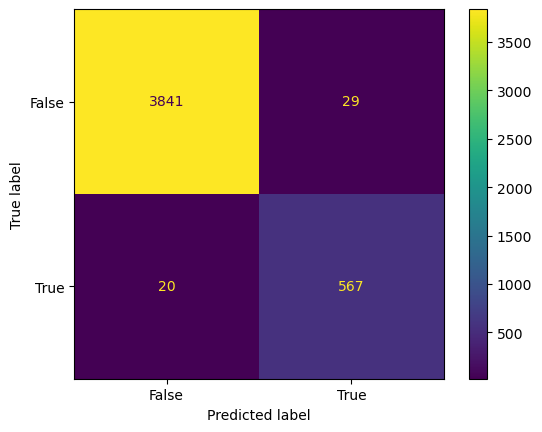

Test Result:
Accuracy Score: 98.57%
_______________________________________________
CLASSIFICATION REPORT:
                False        True  accuracy    macro avg  weighted avg
precision    0.992655    0.944444   0.98565     0.968550      0.985737
recall       0.990576    0.956250   0.98565     0.973413      0.985650
f1-score     0.991614    0.950311   0.98565     0.970962      0.985687
support    955.000000  160.000000   0.98565  1115.000000   1115.000000
_______________________________________________


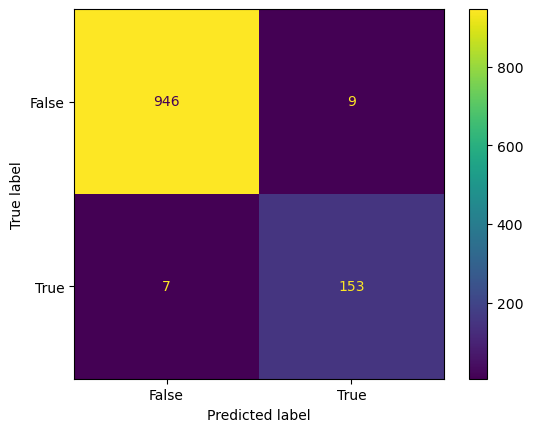

In [18]:
print_score(spam_detect_model, X_train, y_train, X_test, y_test, train=True)
print_score(spam_detect_model, X_train, y_train, X_test, y_test, train=False)

### CREATING TF-IDF MODEL 

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=2500)
X = tv.fit_transform(corpus).toarray()

In [20]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [21]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

In [22]:
#prediction
y_pred=spam_detect_model.predict(X_test)

In [23]:
score=accuracy_score(y_test,y_pred)
print(score)

0.979372197309417


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       False       1.00      0.98      0.99       978
        True       0.86      1.00      0.92       137

    accuracy                           0.98      1115
   macro avg       0.93      0.99      0.96      1115
weighted avg       0.98      0.98      0.98      1115

